# Прогнозирование оттока клиентов

**Основная задача:** 
Подготовить модель, которая позволит спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

**Цель исследования:**
- Построить модель с предельно большим значением F1-меры, довести метрику до 0.59.
- Проверить F1-меру на тестовой выборке.
- Провести измерение AUC-ROC, сравнивать её значение с F1-мерой.

**План работы:**
1. Выгрузить данные, изучить, обработать и подготовить для дальнейшей работы.
2. Исследовать задачу с учётом дисбаланса классов
3. Исследовать задачу, избавившись от дисбаланса
4. Провести тестирование лучшей модели
5. Написать вывод

**Описание данных:**

Признаки:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак:
- Exited — факт ухода клиента

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение" data-toc-modified-id="Загрузка-и-изучение-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение</a></span><ul class="toc-item"><li><span><a href="#Выгрузка" data-toc-modified-id="Выгрузка-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Выгрузка</a></span></li><li><span><a href="#Ознакомление" data-toc-modified-id="Ознакомление-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Ознакомление</a></span></li><li><span><a href="#Корреляция" data-toc-modified-id="Корреляция-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Корреляция</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Сбалансированность-целевого-признака" data-toc-modified-id="Сбалансированность-целевого-признака-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Сбалансированность целевого признака</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Структурирование" data-toc-modified-id="Структурирование-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Структурирование</a></span></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Техника-кодирования-OHE" data-toc-modified-id="Техника-кодирования-OHE-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Техника кодирования OHE</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Модель-DecisionTreeClassifier" data-toc-modified-id="Модель-DecisionTreeClassifier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель DecisionTreeClassifier</a></span></li><li><span><a href="#Модель-RandomForestClassifier" data-toc-modified-id="Модель-RandomForestClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель RandomForestClassifier</a></span></li><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель LogisticRegression</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Заключение</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Модель-DecisionTreeClassifier" data-toc-modified-id="Модель-DecisionTreeClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель DecisionTreeClassifier</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Обучение-на-увеличенной-выборке" data-toc-modified-id="Обучение-на-увеличенной-выборке-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Обучение на увеличенной выборке</a></span></li><li><span><a href="#Обучение-на-уменьшенной-выборке" data-toc-modified-id="Обучение-на-уменьшенной-выборке-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Обучение на уменьшенной выборке</a></span></li></ul></li><li><span><a href="#Модель-RandomForestClassifier" data-toc-modified-id="Модель-RandomForestClassifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель RandomForestClassifier</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Обучение-на-увеличенной-выборке" data-toc-modified-id="Обучение-на-увеличенной-выборке-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Обучение на увеличенной выборке</a></span></li><li><span><a href="#Обучение-на-уменьшенной-выборке" data-toc-modified-id="Обучение-на-уменьшенной-выборке-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Обучение на уменьшенной выборке</a></span></li></ul></li><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель LogisticRegression</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Обучение-на-увеличенной-выборке" data-toc-modified-id="Обучение-на-увеличенной-выборке-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Обучение на увеличенной выборке</a></span></li><li><span><a href="#Обучение-на-уменьшенной-выборке" data-toc-modified-id="Обучение-на-уменьшенной-выборке-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Обучение на уменьшенной выборке</a></span></li></ul></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Заключение</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Метрика-AUC-ROC" data-toc-modified-id="Метрика-AUC-ROC-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Метрика AUC-ROC</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Заключение</a></span></li></ul></li>

## Подготовка данных

Проведём загрузку, изучение и обработку данных

### Загрузка и изучение

In [1]:
#!pip install scikit-learn==1.1.3
#!pip install tqdm

#### Выгрузка

Создадим блок для импорта нужных в работе библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    f1_score,
    roc_auc_score,
    roc_curve,
    recall_score
)
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from tqdm import tqdm

Выгрузим данные в переменную data

In [3]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('https:..')

#### Ознакомление

Ознакомление с первыми 10 строками таблицы

In [4]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Категориальные признаки: 
- RowNumber; 
- CustomerId; 
- Surname; 
- Geography;
- Gender; 
- Age; 
- Tenure; 
- NumOfProducts; 
- HasCrCard;
- IsActiveMember; 
- Exited.

Количественные:
- CreditScore;
- Balance;
- EstimatedSalary.

Получим общую информацию

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

*В столбце Tenure есть пропуски, тип столбца можно перевести в int*

Изучим сводную информацию о датафрейме

In [7]:
data.loc[:, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
     'IsActiveMember', 'EstimatedSalary', 'Exited']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


*Медианы:*
- рейтинг: 650.1;
- возраст: 39;
- лет, сколько человек является клиентом банка: 5;
- баланс: 76485;
- кол-во продуктов: 1.5;
- кредитных карт: 0.7;
- активность: 0.5;
- предполагаемая з/п: 100090.23;
- факт ухода: 0.2.

#### Корреляция

Изучим корреляцию признаков

In [8]:
data_corr = data.corr(numeric_only=True)
data_corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [9]:
def pr_corr(data_corr):
    """
    Функция для нахождения
    наиболее коррелирующих признаков
    из таблицы корреляции
    """
    
    print(f'Столбец{"":<10}Строка{"":<10}Значение')
    for el in data_corr.columns:
        for var in data_corr[el]:
            if var > 0.1 and var < 1:
                print(f'{el :<16} {data_corr[el][data_corr[el] == var].index[0] :<14} {var :.05}')
                
pr_corr(data_corr)                

Столбец          Строка          Значение
Age              Exited         0.28532
Balance          Exited         0.11853
Exited           Age            0.28532
Exited           Balance        0.11853


*Сильная корреляция признаков не наблюдается*

#### Проверка на дубликаты

Выделим ключевые столбцы для проверки:
CustomerId, Surname, Geography, Gender, Age, Tenure, CreditScore

Проведём проверку

In [10]:
data_dup_check = data
for el in ['Surname', 'Geography', 'Gender']:
    try:
        data_dup_check[el] = data_dup_check[el].str.lower()
    except AttributeError:
        print("Возникла ошибка в столбце:", el)
        
data_dup_check.loc[:, ['Surname', 'Geography', 'Gender', 'Tenure', 'CreditScore', 'Age']].duplicated().sum()

0

In [11]:
data['CustomerId'].duplicated().sum()

0

*Дубликаты не найдены*

#### Сбалансированность целевого признака

Изучим целевой признак на сбалансированность классов

In [12]:
data['Exited'].value_counts() / data.shape[0] * 100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

Наблюдается дисбаланс в сторону "0" класса.

#### Вывод

В результате ознакомления с данными получены результаты:
1. обнаружен столбец Tenure с пропусками. Столбец имеет тип float, при этом дробные значения не обнаружены, имеется возможно изменить тип на int;
2. корреляция признаков отсутствует;
3. дубликаты не найдены;
4. сбалансированность целевого признака находится в соотношении:
 - 0 — 79.63%;
 - 1 — 20.37%.
 
 
5. Произведено разделение столбцов на признаки:

    Категориальные:
    - RowNumber; 
    - CustomerId; 
    - Surname; 
    - Geography;
    - Gender; 
    - Age; 
    - Tenure; 
    - NumOfProducts; 
    - HasCrCard;
    - IsActiveMember; 
    - Exited.

   Количественные:
    - CreditScore;
    - Balance;
    - EstimatedSalary.

 
 

### Подготовка данных

#### Обработка пропусков

Изучим на процентное соотношение классы по целевому признаку

In [13]:
omission_tenure = data.loc[data['Tenure'].isna(), :]
omission_tenure['Exited'].value_counts() / 909 * 100

Exited
0    79.867987
1    20.132013
Name: count, dtype: float64

*Распределение классов почти такое же как и во всем датафрейме.*

Изучим корреляцию признаков для заполнения пропусков

In [14]:
tenure_corr = omission_tenure.corr(numeric_only=True)
tenure_corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.002624,0.038683,0.000455,NaN,-0.040211,-0.010692,-0.005296,0.036459,-0.018325,-0.036923
CustomerId,0.002624,1.000000,0.069218,0.000028,NaN,-0.059415,0.039303,0.042422,0.003098,0.066181,0.001235
CreditScore,0.038683,0.069218,1.000000,0.001027,NaN,0.039465,0.023283,-0.020099,-0.026097,-0.067141,-0.058002
Age,0.000455,0.000028,0.001027,1.000000,NaN,-0.005604,-0.018039,0.014739,0.120013,-0.009525,0.310935
Tenure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance,-0.040211,-0.059415,0.039465,-0.005604,NaN,1.000000,-0.326853,0.026921,-0.077324,-0.002999,0.131570
NumOfProducts,-0.010692,0.039303,0.023283,-0.018039,NaN,-0.326853,1.000000,-0.022867,0.014828,0.016380,-0.023493
HasCrCard,-0.005296,0.042422,-0.020099,0.014739,NaN,0.026921,-0.022867,1.000000,-0.042472,-0.048790,-0.024521
IsActiveMember,0.036459,0.003098,-0.026097,0.120013,NaN,-0.077324,0.014828,-0.042472,1.000000,0.076619,-0.166911
EstimatedSalary,-0.018325,0.066181,-0.067141,-0.009525,NaN,-0.002999,0.016380,-0.048790,0.076619,1.000000,-0.028419


Воспользуемся известной функцией для нахожденее наболее коррелирующих признаков

In [15]:
pr_corr(tenure_corr)

Столбец          Строка          Значение
Age              IsActiveMember 0.12001
Age              Exited         0.31094
Balance          Exited         0.13157
IsActiveMember   Age            0.12001
Exited           Age            0.31094
Exited           Balance        0.13157


*Сильной корреляции не наблюдается*

Получим основые сведения о стобце  спропусками

In [16]:
data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

*Имеется небольшая зависимость между возрастом и фактом ухода клиента. Других зависимостей нет, восстановить данные не выйдет. Заполнять значения медианой будет не верным, так как это может сбить с толку модель. Классы целевого признака в столбце с пропусками и общем датасете имеют примерно одинаковое процентное соотношение, удаление в этом случае, мы считаем, лучшим решением, так как в сравнении с заполнением медианой, оно должно в меньшей степени исказить точность.*

In [17]:
data = data.dropna(subset=['Tenure']).reset_index(drop=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 994.5+ KB


#### Изменение типов данных

Изменим тип столбца Tenure


In [19]:
data['Tenure'] = data['Tenure'].astype('int64')

#### Структурирование

В исследовании не важно наличие всех столбцов в датафрейме для обучение модели. Часть признаков не несут ценности для предсказания целевого признака. Чтобы упростить и ускорить подготовку модели разделим датафрейм на несколько таблиц.

In [20]:
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,hargrave,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8,159660.80,3,1,0,113931.57,1


*Столбцы 'RowNumber', 'CustomerId', 'Surname' носят уникальные значения от которых не зависит уход клиента из банка.*

Разобьём таблицу. Потом, если понадобится, можно по индексу соберать вместе.

In [21]:
data_left = data[['RowNumber', 'CustomerId', 'Surname']]
data_right = data.loc[:, 'CreditScore':'Exited']

In [22]:
data_right.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,850,spain,female,43,2,125510.82,1,1,1,79084.10,0


#### Разделение на выборки

Определим обучающий набор данных(features) и целевой признак(target).

In [23]:
features = data_right.drop(['Exited'], axis=1)
target = data_right['Exited']

Разделим набор данных на обучающий(60%), валидационный(20%) и тестовый(20%), по правилу 3:1:1. Для начала получим тестовый и **обучающий набор.**

In [24]:
features_train, features_test, target_train, target_test =\
train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)
features_test.shape

(3637, 10)

Перезапишем пременные и получим **тестовый и валидационный** набор.

In [25]:
features_test, features_valid, target_test, target_valid =\
train_test_split(features_test, target_test, test_size=.5, random_state=12345, stratify=target_test)
print('Размер выборки:')
print(f'- обучающей — {features_train.shape[0]}')
print(f'- валидационной — {features_valid.shape[0]}')
print(f'- тестовой — {features_test.shape[0]}')

Размер выборки:
- обучающей — 5454
- валидационной — 1819
- тестовой — 1818


#### Техника кодирования OHE

Используем технику прямого кодирования библиотеки sklearn для преобразования категориальных признаков, проверим результат.

In [26]:
features_train_ohe = features_train.copy()
features_valid_ohe = features_valid.copy()
features_test_ohe = features_test.copy()
columns=['Geography', 'Gender']

In [27]:
# drop='first' удаляет первый признак из закодированных:
# таким образом обходим dummy-ловушку
# задаём handle_unknown='ignore':
# игнорируется ранее невстречающиеся значения признака (при transform)
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train_ohe[columns])

def enc(features_train_ohe):
    # добавляем закодированные признаки в features_train_ohe
    # encoder_ohe.get_feature_names_out() позволяет получить названия колонок
    features_train_ohe[
        encoder_ohe.get_feature_names_out()
    ] = encoder_ohe.transform(features_train_ohe[columns])

    # удаляем незакодированные категориальные признаки (изначальные колонки)
    features_train_ohe = features_train_ohe.drop(columns, axis=1)
    return features_train_ohe


In [28]:
features_train = enc(features_train_ohe)
features_valid = enc(features_valid_ohe)
features_test = enc(features_test_ohe)

In [29]:
features_valid.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_germany,Geography_spain,Gender_male
3726,675,32,10,0.00,2,1,0,191545.65,0.0,1.0,1.0
4661,784,38,1,138515.02,1,1,1,171768.76,1.0,0.0,1.0
8400,644,49,10,0.00,2,1,1,145089.64,0.0,1.0,1.0


#### Масштабирование признаков

Используем StandardScaler для масштабирования признаков. Уравняем важность.

In [30]:
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])

pd.options.mode.chained_assignment = None
features_train.loc[:, numeric] = scaler.transform(features_train.loc[:, numeric])
features_valid.loc[:, numeric] = scaler.transform(features_valid.loc[:, numeric])
features_test.loc[:, numeric] = scaler.transform(features_test.loc[:, numeric])

*Теперь таблица подготовлена для операций машинного обучения.*

## Исследование задачи

Изучим как работают несколько моделей и выберем лучшую.

### Модель DecisionTreeClassifier

Определим для модели лучшее значение среднего гармонического полноты и точности с лучшими гиперпараметрами.

In [31]:
best_model_DTC = None
best_result_DTC = 0
for el in tqdm(['random', 'best']):
        for depth in range(1, 21):
            for spl in range(2, 8):
                    # Определение гиперпараметров модели
                    model = DecisionTreeClassifier(random_state=12345,
                                                   max_depth=depth,
                                                   splitter=el,
                                                   min_samples_split=spl)
                                                   
                    # обучение модели
                    model.fit(features_train, target_train) 
                    # предсказания модели на валидационной выборке
                    predictions = model.predict(features_valid) 
                    # нахождение качества модели для валидационной выборки
                    score_DTC = f1_score(target_valid, predictions)
                    if score_DTC > best_result_DTC:
                        f1_score_DTC = score_DTC
                        best_model_DTC = model
                        DTC_depth = depth
                        DTC_splitter = el
                        DTC_split = spl
                        
                
print(f'top_f1_score_DTC: {f1_score_DTC}'
     f'\nmax_depth: {DTC_depth}' 
     f'\nsplitter: {DTC_splitter}'
     f'\nmin_samples_split: {DTC_split}') 

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.41s/it]

top_f1_score_DTC: 0.5227272727272727
max_depth: 20
splitter: best
min_samples_split: 7


*Лучшая модель DecisionTreeClassifier показала F1-меру: 0.52*

### Модель RandomForestClassifier

Определим для модели лучшее значение среднего гармонического полноты и точности с лучшими гиперпараметрами.

In [32]:
best_model_RFC = None
f1_score_RFC = 0
for est in tqdm(range(1, 40)):
    for depth in range(1, 12):
        for spl in range(2, 8):  
            model = RandomForestClassifier(random_state=12345,
                                          n_estimators=est,
                                          max_depth=depth,
                                          min_samples_split=spl)
                                          
            model.fit(features_train, target_train)
            predictions_valid = model.predict(features_valid)
            score = f1_score(target_valid, predictions_valid)
            if score > f1_score_RFC:
                f1_score_RFC = score
                best_model_RFC = model
                RFC_estimators = est
                RFC_depth = depth
                RFC_split = spl
                
                    
    
    
print(f'top_f1_score_RFC: {f1_score_RFC}'
     f'\nn_estimators: {RFC_estimators}'
     f'\nmax_depth: {RFC_depth}'
     f'\nmin_samples_split: {RFC_split}')
         

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [04:43<00:00,  7.26s/it]

top_f1_score_RFC: 0.5831903945111492
n_estimators: 16
max_depth: 10
min_samples_split: 2


*Лучшая модель RandomForestClassifier показала F1-меру: 0.58*

### Модель LogisticRegression

Определим для модели лучшее значение среднего гармонического полноты и точности с лучшими гиперпараметрами.

In [33]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.35203094777562866


Лучшая модель LogisticRegression показала F1-меру: 0.35

### Заключение

**Вывод:**
Среди рассмотренных моделей лучшей оказалась RandomForestClassifier с F1 мерой 0.58. Попробуем улучшить результат, проведя балансирование признаков. 

## Борьба с дисбалансом

В этом пункте проведём работу по избавлению от дисбаланса и обучению на сбалансированной выборке выбранной модели.

### Увеличение выборки

Избавляться от дисбаланса классов будем путём увеличения обучающей выборки, чтобы не потерять в точности. Напомним процентное соотношение целевого признака.

In [34]:
data['Exited'].value_counts() / data.shape[0] * 100

Exited
0    79.606204
1    20.393796
Name: count, dtype: float64

Создадим функцию для балансирования наименьшего класса и его признаков. Функция собирает признаки, где значение целевого признака равно 1 и 0, увеличивает количество наименьшего класса для пропорционального равенства, затем возвращает значения целевого признака и значения обучающих признаков.

In [35]:
def unsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_unsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_unsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_unsampled, target_unsampled = shuffle(
        features_unsampled, target_unsampled, random_state=12345)
    
    return features_unsampled, target_unsampled

features_unsample, target_unsample = unsample(features_train, target_train, 4)
    

Проведём проверку на количество признаков

In [36]:
print(features_unsample.shape, target_unsample.shape)

(8790, 11) (8790,)


### Уменьшение выборки

Создадим функцию, которая балансирует выборку, путём уменьшения наиболее часто встречающегося класса и его объектов.

In [37]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Проведём проверку на количество признаков


In [38]:
print(features_downsampled.shape, target_downsampled.shape)

(2198, 11) (2198,)


### Модель DecisionTreeClassifier

#### Взвешивание классов

In [39]:
model_DTC_b = None
result_DTC_b = 0
for el in tqdm(['random', 'best']):
        for depth in range(1, 21):
            for spl in range(2, 8):
                    # Определение гиперпараметров модели
                    model = DecisionTreeClassifier(random_state=12345,
                                                   max_depth=depth,
                                                   splitter=el,
                                                   min_samples_split=spl,
                                                   class_weight='balanced')
                                                   
                    # обучение модели
                    model.fit(features_train, target_train) 
                    # предсказания модели на валидационной выборке
                    predictions = model.predict(features_valid) 
                    # нахождение качества модели для валидационной выборки
                    score_DTC = f1_score(target_valid, predictions)
                    if score_DTC > best_result_DTC:
                        f1_score_DTC_b = score_DTC
                        best_model_DTC_b = model
                        DTC_depth_b = depth
                        DTC_splitter_b = el
                        DTC_split_b = spl
                        
                
print(f'top_f1_score_DTC: {f1_score_DTC_b}'
     f'\nmax_depth: {DTC_depth_b}' 
     f'\nsplitter: {DTC_splitter_b}'
     f'\nmin_samples_split: {DTC_split_b}') 

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.80s/it]

top_f1_score_DTC: 0.4975845410628019
max_depth: 20
splitter: best
min_samples_split: 7


*Модель DecisionTreeClassifier при гиперпараметре `class_weight='balanced'` показала F1-меру: 0.49*

#### Обучение на увеличенной выборке

Проводить обучение будем с учётом балансирования выборки в большую сторону для лучшей точности. Используем DecisionTreeClassifier. Получим F1-меру.

In [40]:
model_DTC_us = None
result_DTC_us = 0
for el in tqdm(['random', 'best']):
        for depth in range(1, 21):
            for spl in range(2, 8):
                    # Определение гиперпараметров модели
                    model = DecisionTreeClassifier(random_state=12345,
                                                   max_depth=depth,
                                                   splitter=el,
                                                   min_samples_split=spl)
                                                   
                    # обучение модели
                    model.fit(features_unsample, target_unsample) 
                    # предсказания модели на валидационной выборке
                    predictions = model.predict(features_valid) 
                    # нахождение качества модели для валидационной выборки
                    score_DTC = f1_score(target_valid, predictions)
                    if score_DTC > best_result_DTC:
                        f1_score_DTC_us = score_DTC
                        best_model_DTC_us = model
                        DTC_depth_us = depth
                        DTC_splitter_us = el
                        DTC_split_us = spl
                        
                
print(f'top_f1_score_DTC_ls: {f1_score_DTC_us}'
     f'\nmax_depth: {DTC_depth_us}' 
     f'\nsplitter: {DTC_splitter_us}'
     f'\nmin_samples_split: {DTC_split_us}') 

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.68s/it]

top_f1_score_DTC_ls: 0.48627450980392156
max_depth: 20
splitter: best
min_samples_split: 7


*Модель DecisionTreeClassifier при балансировании увеличением выборки показала F1-меру: 0.48*

#### Обучение на уменьшенной выборке

Проведём эксперимент и обучим модель на уменьшенной выборке.

In [41]:
model_DTC_ds = None
result_DTC_ds = 0
for el in tqdm(['random', 'best']):
        for depth in range(1, 21):
            for spl in range(2, 8):
                    # Определение гиперпараметров модели
                    model = DecisionTreeClassifier(random_state=12345,
                                                   max_depth=depth,
                                                   splitter=el,
                                                   min_samples_split=spl)
                                                   
                    # обучение модели
                    model.fit(features_downsampled, target_downsampled) 
                    # предсказания модели на валидационной выборке
                    predictions = model.predict(features_valid) 
                    # нахождение качества модели для валидационной выборки
                    score_DTC = f1_score(target_valid, predictions)
                    if score_DTC > best_result_DTC:
                        f1_score_DTC_ds = score_DTC
                        best_model_DTC_ds = model
                        DTC_depth_ds = depth
                        DTC_splitter_ds = el
                        DTC_split_ds = spl
                        
                
print(f'top_f1_score_DTC_ls: {f1_score_DTC_ds}'
     f'\nmax_depth: {DTC_depth_ds}' 
     f'\nsplitter: {DTC_splitter_ds}'
     f'\nmin_samples_split: {DTC_split_ds}') 

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]

top_f1_score_DTC_ls: 0.49272550921435493
max_depth: 20
splitter: best
min_samples_split: 7


*Модель DecisionTreeClassifier при балансировании уменьшением выборки показала F1-меру: 0.49*

### Модель RandomForestClassifier

#### Взвешивание классов

In [42]:
model_RFC_b = None
f1_score_RFC_b = 0
for est in tqdm(range(1, 40)):
    for depth in range(1, 12):
        for spl in range(2, 8):
            model = RandomForestClassifier(random_state=12345,
                                          n_estimators=est,
                                          max_depth=depth,
                                          min_samples_split=spl,
                                          class_weight='balanced')

            model.fit(features_train, target_train)
            predictions_valid = model.predict(features_valid)
            score = f1_score(target_valid, predictions_valid)
            if score > f1_score_RFC:
                f1_score_RFC_b = score
                best_model_RFC_b = model
                RFC_estimators_b = est
                RFC_depth_b = depth
                RFC_split_b = spl
               
                    
    
    
print(f'top_f1_score_RFC: {f1_score_RFC_b}'
     f'\nn_estimators: {RFC_estimators_b}'
     f'\nmax_depth: {RFC_depth_b}'
     f'\nmin_samples_split: {RFC_split_b}')

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [04:47<00:00,  7.37s/it]

top_f1_score_RFC: 0.599721059972106
n_estimators: 39
max_depth: 11
min_samples_split: 7


*Модель RandomForestClassifier при гиперпараметре `class_weight='balanced'` показала F1-меру: 0.6*

#### Обучение на увеличенной выборке

Проводить обучение будем с учётом балансирования выборки в большую сторону для лучшей точности. Используем  RandomForestClassifier как модель, которая лучше всего себя показала. Получим F1-меру.

In [43]:
model_RFC_us = None
f1_score_RFC_us = 0
for est in tqdm(range(1, 40)):
    for depth in range(1, 12):
        for spl in range(2, 8):
            model = RandomForestClassifier(random_state=12345,
                                          n_estimators=est,
                                          max_depth=depth,
                                          min_samples_split=spl)

            model.fit(features_unsample, target_unsample)
            predictions_valid = model.predict(features_valid)
            score = f1_score(target_valid, predictions_valid)
            if score > f1_score_RFC:
                f1_score_RFC_us = score
                best_model_RFC_us = model
                RFC_estimators_us = est
                RFC_depth_us = depth
                RFC_split_us = spl
               
                    
    
    
print(f'top_f1_score_RFC: {f1_score_RFC_us}'
     f'\nn_estimators: {RFC_estimators_us}'
     f'\nmax_depth: {RFC_depth_us}'
     f'\nmin_samples_split: {RFC_split_us}')
       

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [05:59<00:00,  9.22s/it]

top_f1_score_RFC: 0.592020592020592
n_estimators: 39
max_depth: 11
min_samples_split: 7


*Модель RandomForestClassifier при балансировании увеличением выборки показала F1-меру: 0.59*

#### Обучение на уменьшенной выборке

Проведём эксперимент и обучим модель на уменьшенной выборке.

In [44]:
best_model_RFC_ds = None
f1_score_RFC_ds = 0
for est in tqdm(range(1, 40)):
    for depth in range(1, 12):
        for spl in range(2, 8):
            model = RandomForestClassifier(random_state=12345,
                                          n_estimators=est,
                                          max_depth=depth,
                                          min_samples_split=spl)

            model.fit(features_downsampled, target_downsampled)
            predictions_valid = model.predict(features_valid)
            score = f1_score(target_valid, predictions_valid)
            if score > f1_score_RFC:
                RFC_score_ds = score
                best_model_RFC_ds = model
                RFC_estimators_ds = est
                RFC_depth_ds = depth
                RFC_split_ds = spl
                
                    
    
    
print(f'top_f1_score_RFC: {RFC_score_ds}'
     f'\nn_estimators: {RFC_estimators_ds}'
     f'\nmax_depth: {RFC_depth_ds}'
     f'\nmin_samples_split: {RFC_split_ds}')
        

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [02:40<00:00,  4.11s/it]

top_f1_score_RFC: 0.5839909808342727
n_estimators: 39
max_depth: 7
min_samples_split: 4


*Модель RandomForestClassifier при балансировании уменьшением выборки показала F1-меру: 0.58*

### Модель LogisticRegression

#### Взвешивание классов

Проведём балансировку класса, используя гиперпараметр class_weight='balanced'.

In [45]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid_b = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_b))

F1: 0.5087040618955513


*Модель LogisticRegression при гиперпараметре class_weight='balanced' показала F1-меру: 0.509*

#### Обучение на увеличенной выборке

In [46]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_unsample, target_unsample)
predicted_valid_us = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_us))

F1: 0.5087040618955513


*Модель LogisticRegression при балансировании увеличением выборки показала F1-меру: 0.509*

#### Обучение на уменьшенной выборке

In [47]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid_ds = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_ds))

F1: 0.5071496663489038


*Модель LogisticRegression при балансировании уменьшением выборки показала F1-меру: 0.507*

### Заключение

**Вывод:** 
- Лучшей моделью оказалась RandomForestClassifier(**best_model_RFC_b**)
- В результате балансирования классов удалось улучшить показатель F1-меры, до балансирования метрика лучшей модели RandomForestClassifier была 0.58, после проведения балансирования 0.6. 
- Наилучший результат F1-меры показала модель, сбалансированная гиперпараметром `class_weight='balanced'`.


Использованные гиперпараметры модели:
- random_state: 12345
- n_estimators: 39
- max_depth: 11
- min_samples_split: 7
- class_weight: 'balanced'

## Тестирование модели

Проведём тестирование лучшей модели, сравним F1-меру и метрику AUC-ROC.

### Тестирование

In [48]:
predictions_test = best_model_RFC_b.predict(features_test)
rfc_test_score = f1_score(target_test, predictions_test)
print(f'Значение F1-меры на тестовой выборке: {rfc_test_score}')

Значение F1-меры на тестовой выборке: 0.6364883401920439


### Метрика AUC-ROC

Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем AUC-ROC.

In [49]:
probabilities_test = best_model_RFC_b.predict_proba(features_test)
probabilities_one_valid = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
print(auc_roc)

0.869820820845061


Text(0.5, 1.0, 'ROC-кривая')

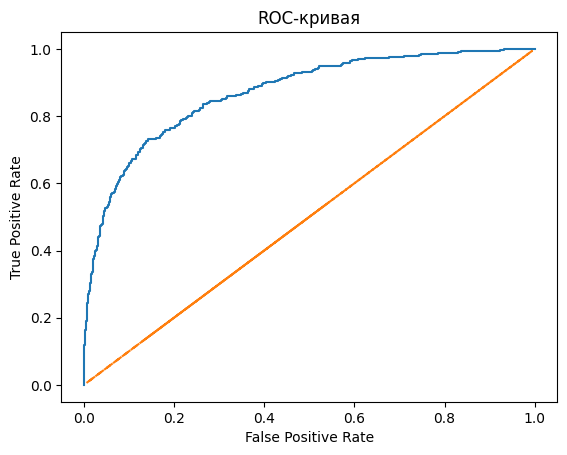

In [50]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid) 
plt.plot(fpr, tpr)
plt.plot(probabilities_one_valid, probabilities_one_valid, linestyle = 'dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

*Полученное значение метрики говорит о высоком качестве  модели, отличающейся от случайной.*

Изучим показатель метрики `recall`

In [51]:
print(recall_score(target_test, predictions_test))

0.6253369272237197


### Заключение

**Вывод:**

В результате тестирование трёх моделей(DecisionTreeClassifier, RandomForestClassifier, LogisticRegression) с перебором гиперпараметров до решения вопроса с дисбалансом и после, была выбрана модель RandomForestClassifier, так как она показала лучшие параметры:
- **Не решен вопрос с дисбалансом:**
 - RandomForestClassifier:
   - F1-мера: 0.58
 - DecisionTreeClassifier:
   - F1-мера: 0.52
 - LogisticRegression:
   - F1-мера: 0.35
   
   
- **Решен вопрос с дисбалансом:**
 - RandomForestClassifier:
   - F1-мера: 0.6
 - DecisionTreeClassifier:
   - F1-мера: 0.497
 - LogisticRegression:
   - F1-мера: 0.508   


Лучшим способом решения вопроса дисбаланса для моделей оказался способ указания гиперпараметра модели class_weight='balanced'. Метрика AUC-ROC показала значение 0.87, что говорит о качестве модели, которая отличается от случайной на 0.37. В целом можно сказать, что борьба с дисбалансом и обучение на увеличенной выборке положительно сказалось на модели. Метрика recall позволила определить как хорошо модель ищет клиентов, которые могут уйти, её точность: 0.625.

Финальная модель позволяет с неплохой точностью определить потенциальных клиентов, которые могут уйти из банка и предопределить дальнейшие действия для предотвращения оттока клиентов.